In [1]:
import os

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info
import numpy as np

from learnMSA import Configuration
from learnMSA.msa_hmm import SequenceDataset, align
from learnMSA.msa_hmm.Visualize import print_and_plot

2025-11-06 15:53:46.470377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762440826.486598  418273 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762440826.491571  418273 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762440826.504544  418273 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762440826.504564  418273 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762440826.504566  418273 computation_placer.cc:177] computation placer alr


# Experimental demo: learnMSA + protein language model

This notebook demonstrates how to align a set of protein sequences with learnMSA supported by a large, pre-trained protein language model.

This configuration of learnMSA is the most accurate variant of learnMSA currently available. It is also the most computationally expensive. It is recommended to run this notebook on a GPU.

In [2]:
# Your fasta file to align.
train_filename = "../tests/data/egf.fasta"

# The output filename for the alignment.
out_filename = "tmp/interactive.alignment.fasta"

# Create a working directory.
os.makedirs("tmp", exist_ok = True)

Training of 4 models on file egf.fasta


/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Computing all embeddings (this may take a while).
10% done.
20% done.
30% done.
40% done.
50% done.
60% done.
70% done.
80% done.
90% done.
100% done.
Fitting models of lengths [23 25 25 25] on 7774 sequences.
Batch size= 190 Learning rate= 0.05
Using sequence weights  [1.         0.33333334 0.05882353 ... 0.05555556 0.03030303 0.25      ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using GPU.


I0000 00:00:1762440907.138530  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1762440909.435155  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1762440928.100793  418431 cuda_solvers.cc:175] Creating GpuSolver handles for stream 0x5a43a4dea970


46/46 - 24s - 523ms/step - aux_loss: 0.0000e+00 - loglik: -9.2083e+01 - loss: 107.5314 - prior: -1.5448e+01
Epoch 2/10
46/46 - 4s - 97ms/step - aux_loss: 0.0000e+00 - loglik: -7.0144e+01 - loss: 74.0911 - prior: -3.9472e+00
Epoch 3/10
46/46 - 4s - 97ms/step - aux_loss: 0.0000e+00 - loglik: -6.8197e+01 - loss: 70.7500 - prior: -2.5527e+00
Epoch 4/10
46/46 - 4s - 97ms/step - aux_loss: 0.0000e+00 - loglik: -6.8269e+01 - loss: 70.3711 - prior: -2.1025e+00
Epoch 5/10
46/46 - 4s - 97ms/step - aux_loss: 0.0000e+00 - loglik: -6.7849e+01 - loss: 69.7966 - prior: -1.9474e+00
Epoch 6/10
46/46 - 4s - 93ms/step - aux_loss: 0.0000e+00 - loglik: -6.7736e+01 - loss: 69.6105 - prior: -1.8742e+00
Epoch 7/10
46/46 - 4s - 95ms/step - aux_loss: 0.0000e+00 - loglik: -6.7896e+01 - loss: 69.7311 - prior: -1.8353e+00
Fitted model successfully.
Creating alignment model...
Successfully created alignment model.


I0000 00:00:1762440962.584054  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


expansions model 0: [(0, 1), (10, 9)]
expansions model 1: [(8, 1), (11, 2), (12, 3), (16, 3)]
expansions model 2: [(8, 1), (11, 2), (12, 5)]
expansions model 3: [(8, 1), (11, 2), (12, 5)]
Re-initialized the encoder parameters.
Fitting models of lengths [33, 34, 33, 33] on 7774 sequences.
Batch size= 190 Learning rate= 0.05
Using sequence weights  [1.         0.33333334 0.05882353 ... 0.05555556 0.03030303 0.25      ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using GPU.


I0000 00:00:1762440968.942930  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/20


I0000 00:00:1762440971.114347  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


46/46 - 23s - 509ms/step - aux_loss: 0.0000e+00 - loglik: -6.4060e+01 - loss: 79.6326 - prior: -1.5572e+01
Epoch 2/20
46/46 - 4s - 96ms/step - aux_loss: 0.0000e+00 - loglik: -6.1190e+01 - loss: 65.0638 - prior: -3.8734e+00
Epoch 3/20
46/46 - 4s - 92ms/step - aux_loss: 0.0000e+00 - loglik: -6.1163e+01 - loss: 63.4612 - prior: -2.2980e+00
Epoch 4/20
46/46 - 4s - 97ms/step - aux_loss: 0.0000e+00 - loglik: -6.1325e+01 - loss: 63.1075 - prior: -1.7822e+00
Epoch 5/20
46/46 - 5s - 100ms/step - aux_loss: 0.0000e+00 - loglik: -6.1249e+01 - loss: 62.8275 - prior: -1.5787e+00
Epoch 6/20
46/46 - 4s - 95ms/step - aux_loss: 0.0000e+00 - loglik: -6.1181e+01 - loss: 62.6520 - prior: -1.4710e+00
Epoch 7/20
46/46 - 4s - 94ms/step - aux_loss: 0.0000e+00 - loglik: -6.1146e+01 - loss: 62.5482 - prior: -1.4022e+00
Epoch 8/20
46/46 - 4s - 97ms/step - aux_loss: 0.0000e+00 - loglik: -6.1079e+01 - loss: 62.4124 - prior: -1.3331e+00
Epoch 9/20
46/46 - 4s - 92ms/step - aux_loss: 0.0000e+00 - loglik: -6.1098e+01 -

I0000 00:00:1762441047.770855  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Aligning 0 insertion slices with famsa.
time for generating output: 3.8988
Wrote file tmp/interactive.alignment.fasta
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step
>l=-53.74_t=0.01
........................$CD........P........NP.CYN..H.GT..C-...SLR.....................-ATGYTCSC.L....PR......YT......GEH$..........................
>l=-55.53_t=0.00
........................$CD........S........QP.CRN..-.GT..CS...LNT.....................-NTDYTCAC.F....PG......YT......GRY$..........................
>l=-47.34_t=0.00
........................$CD........S........DP.CLN..G.GT..C-...TLR.....................SLDSYSCAC.A....PG......YT......GQH$..........................
>l=-62.20_t=0.00
........................$CD........H........VT.CLN..G.GT..C-...QLK.....................TLEDYTCAC.A....NG......YT......GER$..........................
>l=-62.76_t=0.00
........................$CD........H........VT.CLN..G.GT..C-...QLK.....................TLEEYTCAC.A....NG......YT......GDR$..........................
>l=-62.69_t=

I0000 00:00:1762441056.606411  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1762441056.847076  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1762441057.021627  418273 gpu_device.cc:2019] Created device /device:GPU:0 with 21824 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


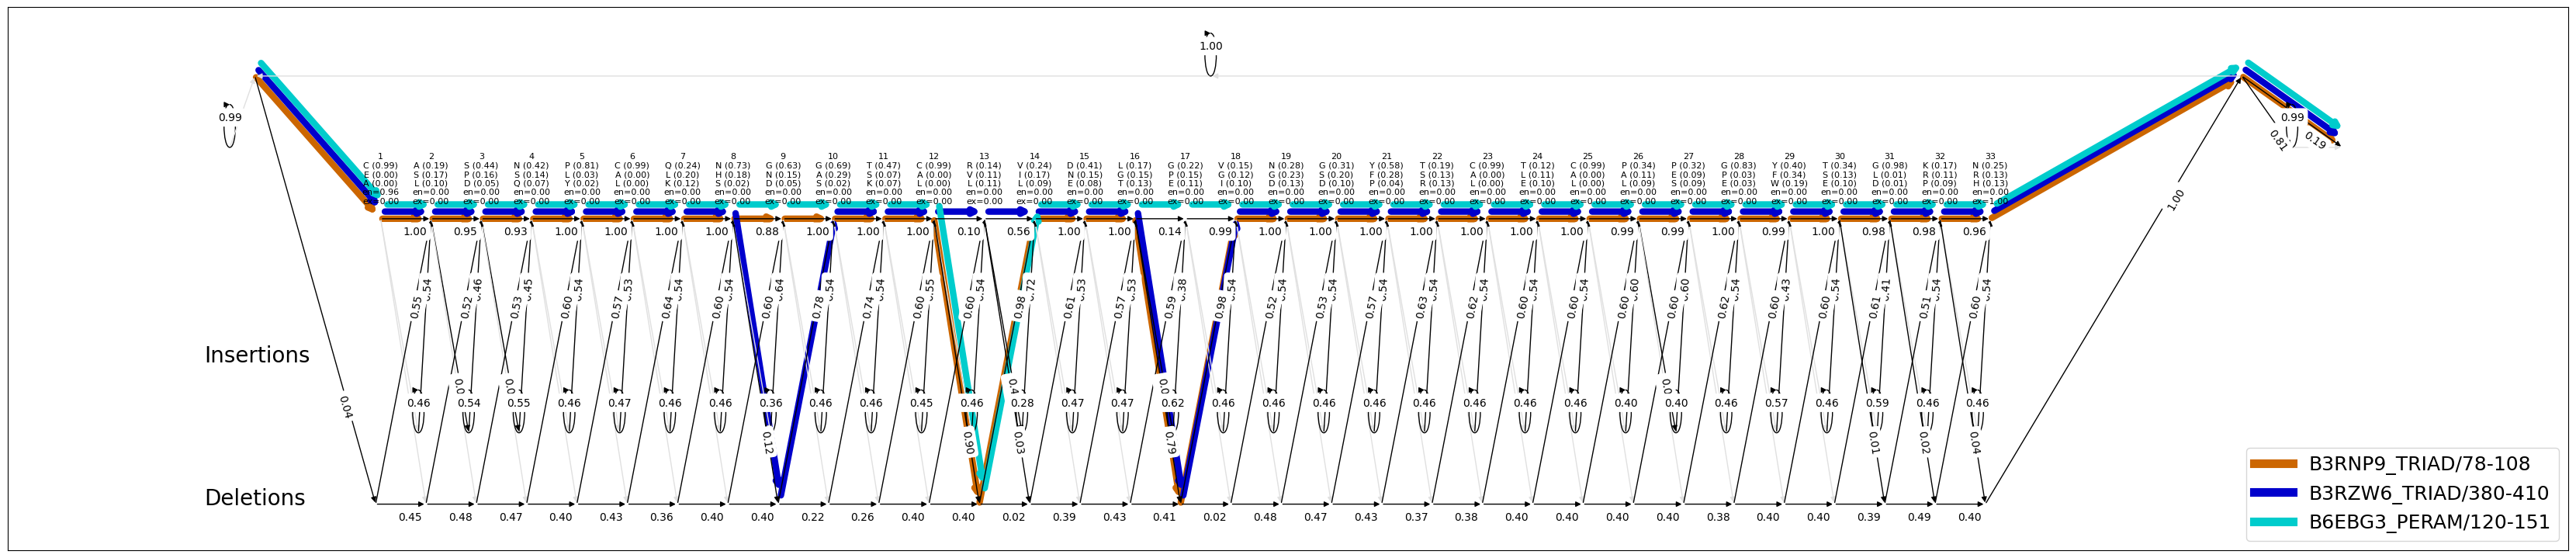

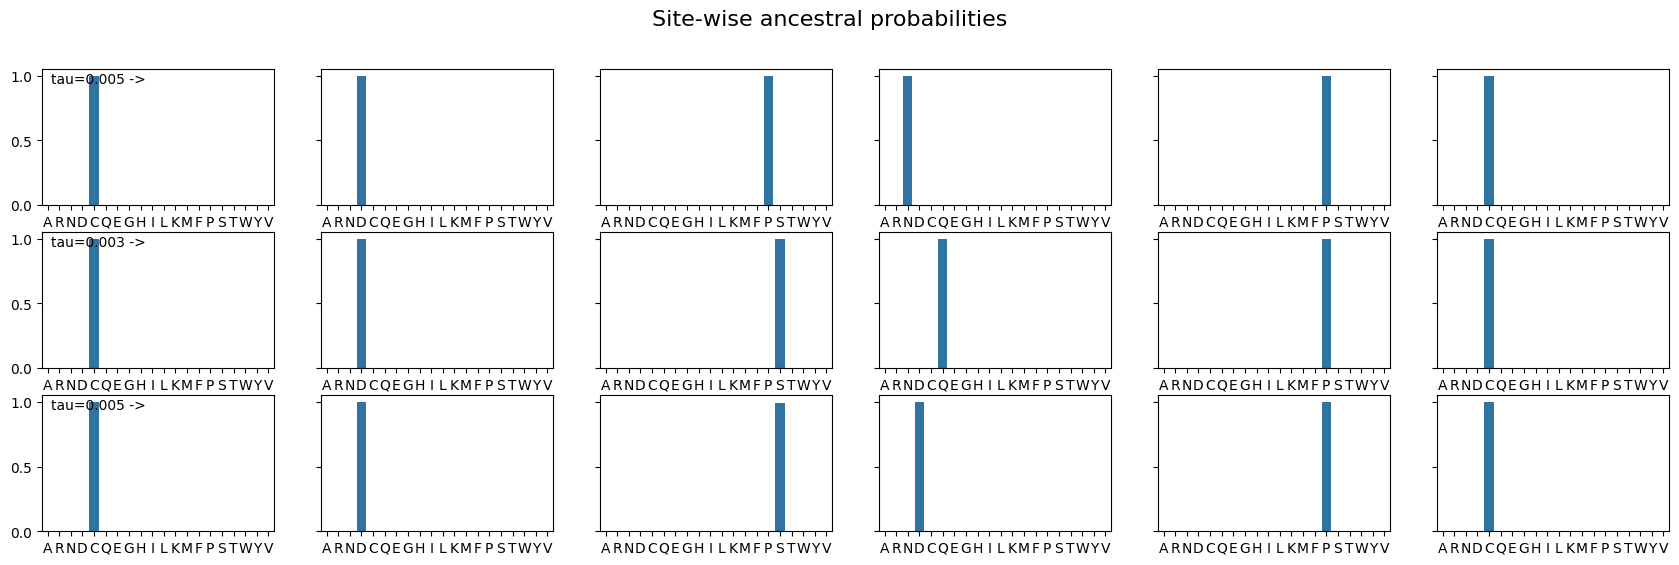

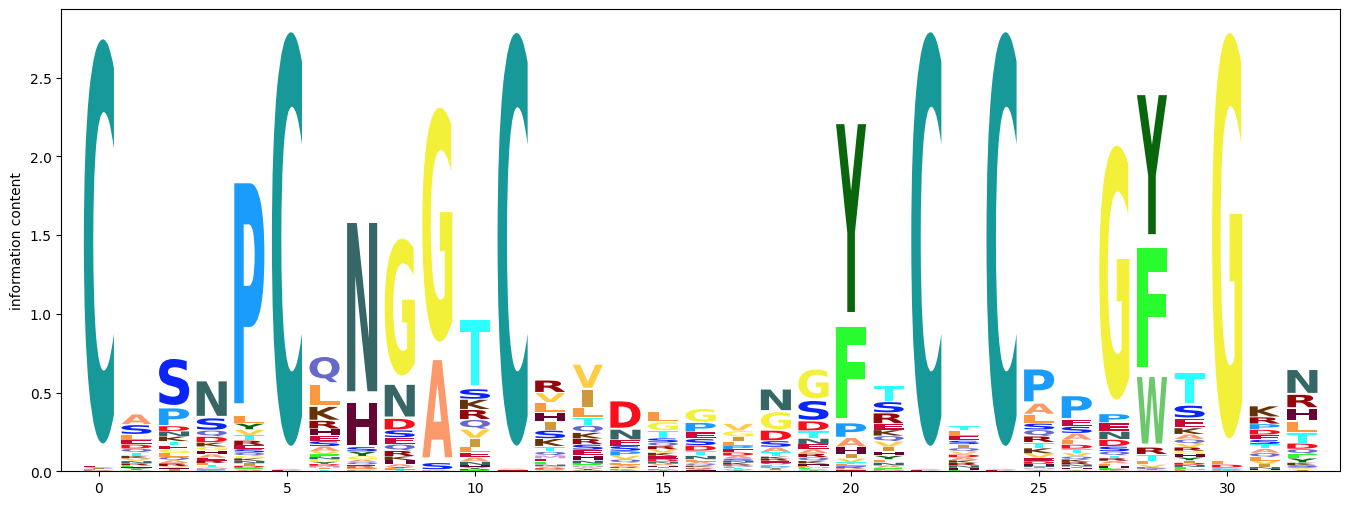

In [3]:
# Create a default configuration
# The attributes of the configuration mirror
# the command line interface
config = Configuration()
config.input_output.output_file = out_filename

# Enable language model usage
config.language_model.use_language_model = True

# Load a dataset and align the sequences
with SequenceDataset(train_filename) as data:
    alignment_model = align(data, config)

print_and_plot(alignment_model)